# Тема: Искусственный нейрон и однослойный перцептрон

Искусственный нейрон — это математическая модель биологического нейрона.

Он получает на вход несколько значений x1, x2, ..., xn,
умножает их на соответствующие веса w1, w2, ..., wn,
добавляет смещение (bias) и пропускает результат через функцию активации.

Формула работы нейрона:
y = f(w1*x1 + w2*x2 + b)

где:
  - w — веса,
  - b — смещение (bias),
  - f — функция активации (например, сигмоида, ReLU, tanh).

Однослойный перцептрон — это простейшая нейронная сеть, состоящая из одного слоя искусственных нейронов.

Каждый нейрон принимает на вход несколько признаков и выдает один выход.

Если нейронов несколько, то их выходы формируют вектор — предсказание сети.

Перцептрон способен решать задачи линейной классификации — то есть разделять данные, которые можно отделить прямой или гиперплоскостью.

Однако он не может решить задачи, где классы разделяются нелинейно (например, логическую операцию XOR).

Правило обучения перцептрона:

w = w + η * (y_true - y_pred) * x
где:
  - η — скорость обучения,
  - y_true — истинное значение,
  - y_pred — предсказанное.

Таким образом, перцептрон корректирует веса, если предсказание неверное, постепенно улучшая свою способность различать классы.

In [21]:
import numpy as np
import matplotlib.pyplot as plt

In [44]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def linear(z):
    return z

def single_step(z):
    return (z >= 0).astype(int)

def th(z):
    return (np.exp(z) - np.exp(-z)) / (np.exp(z) + np.exp(-z))

def arctan(z):
    return np.arctan(z)

def neuron_output(X, w, b):
    z = np.dot(X, w) + b
    return arctan(z)

In [31]:
SIZE = 100
SEED = 45

In [32]:
np.random.seed(SEED)

class_1 = np.random.randn(SIZE, 2) + np.array([-2, -2])
class_2 = np.random.randn(SIZE, 2) + np.array([2, 2])

X = np.vstack((class_1, class_2))
y = np.array([0]*SIZE + [1]*SIZE)


w = np.random.randn(2)
b = 0.0

outputs = neuron_output(X, w, b)

y_pred = (outputs > 0.5).astype(int)


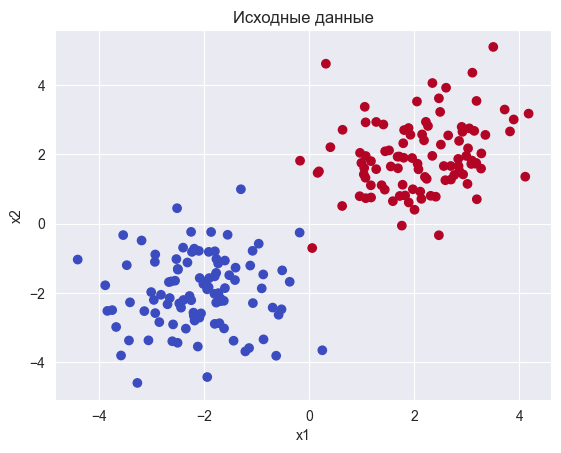

In [33]:
plt.scatter(X[:,0], X[:,1], c=y, cmap='coolwarm')
plt.title('Исходные данные')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [40]:
def plot_decision_boundary(w, b):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    Z = neuron_output(np.c_[xx.ravel(), yy.ravel()], w, b)
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, levels=[0, 0.5, 1], alpha=0.2, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')
    plt.title('Граница решений однослойного перцептрона')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.show()


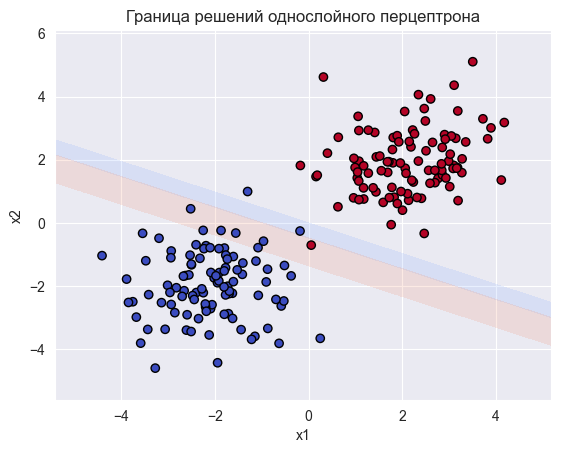

In [41]:
plot_decision_boundary(w, b)

In [45]:
LEARNING_RATE = 0.1
EPOCHS = 10

In [46]:
b = 0.0

losses = []

for epoch in range(EPOCHS):
    for i in range(len(X)):
        z = np.dot(X[i], w) + b
        y_pred = 1 if z >= 0 else 0
        error = y[i] - y_pred
        w += LEARNING_RATE * error * X[i]
        b += LEARNING_RATE * error
    preds = np.array([1 if np.dot(x, w) + b >= 0 else 0 for x in X])
    acc = (preds == y).mean()
    losses.append(1 - acc)
    print(f"Эпоха {epoch+1}/{EPOCHS} — точность: {acc:.4f}")



Эпоха 1/10 — точность: 0.9950
Эпоха 2/10 — точность: 0.9950
Эпоха 3/10 — точность: 0.9950
Эпоха 4/10 — точность: 0.9900
Эпоха 5/10 — точность: 0.9950
Эпоха 6/10 — точность: 0.9950
Эпоха 7/10 — точность: 0.9950
Эпоха 8/10 — точность: 0.9950
Эпоха 9/10 — точность: 1.0000
Эпоха 10/10 — точность: 1.0000


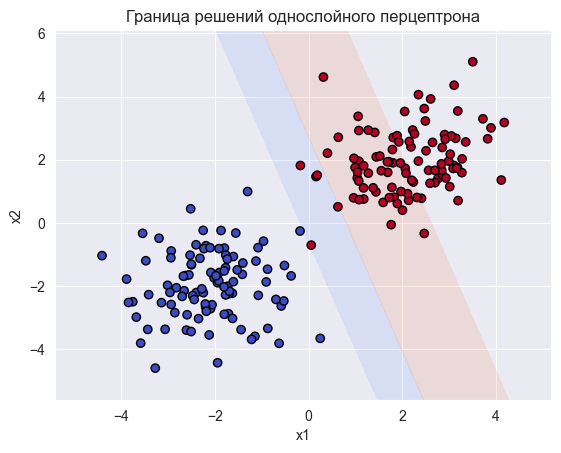

In [47]:
plot_decision_boundary(w, b)

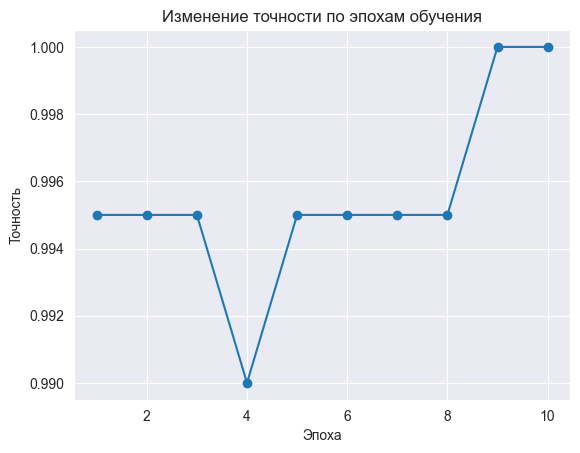

In [48]:
plt.plot(range(1, EPOCHS + 1), [1 - l for l in losses], marker='o')
plt.title('Изменение точности по эпохам обучения')
plt.xlabel('Эпоха')
plt.ylabel('Точность')
plt.grid(True)
plt.show()


1. Что делает функция активации в искусственном нейроне2. Чем отличается искусственный нейрон от однослойного перцептрона?

**Ответ:**  1) ф-я активации нужна чтобы добавить нелинейности моели, т.е. определяет будет ли активирован нейрон или нет при тех или иных данных, нужно чтобы НС могла учить сложные зависимости. 2) Нейрон это 1 ълемент модели, а однослойный перцептрон это простейшая модель у которой есть 1 слой состоящий из нейронов.

2. Какое правило используется для обучения перцептрона?

**Ответ:** Веса коррелируется пропорционально ошибке (w += LEARNING_RATE * error * X[i] )

3. Почему однослойный перцептрон не может решить задачу XOR?

**Ответ:** Задача xor нелинейна. Одного слоя недостаточно для решения нелинейной задачи.

4. Что произойдет, если изменить функцию активации с сигмоиды на ReLU?

**Ответ:** модель станет быстрее и устойчивее, но чатсь нейронов могут перестать участвовать в вычислении ответа, из-за отрицательного входо
